In [98]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import interpolate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [85]:
def beautyTable(name, df, size):
    fig = plt.figure(figsize = size)
    ax = fig.add_subplot(111)
    table = ax.table(cellText = df.values,
              rowLabels = df.index,
              colLabels = df.columns,
              loc = "center"
             )
    table.scale(1.5,3)
    table.set_fontsize (14)
    ax.set_title(name)
    ax.axis("off")
    plt.show()

In [112]:
omeg = np.array([8, 24, 40,  56, 72, 88]) 
someg = [str(i)+" кГц" for i in omeg]
default = np.array([0.8, 0.275, 0.17, 0.125, 0.09, 0.07])
c1 = np.array([0.78, 0.25, 0.15, 0.1, 0.06, 0.04])
c2 = np.array([0.78, 0.24, 0.135,  0.085, 0.05, 0.03])
c3 = np.array([0.75, 0.19, 0.09, 0.05, 0.03, 0.02])

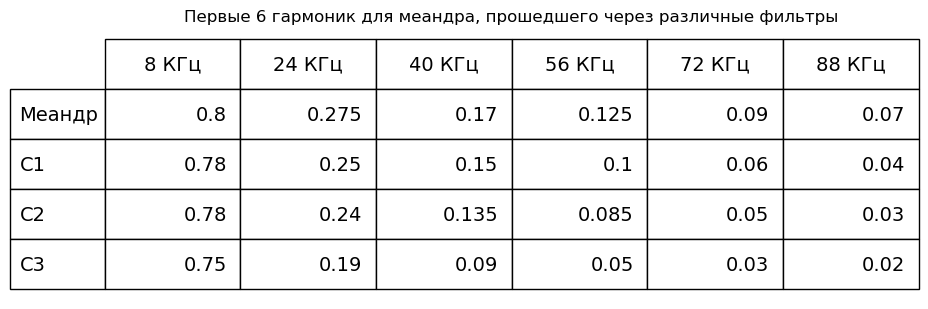

In [113]:
df = pd.DataFrame([default, c1, c2, c3], index =["Меандр", "С1", "С2", "С3"], columns = someg)
df.style.set_caption("Первые 6 гармоник для меандра, прошедшего через различные фильтры")
beautyTable("Первые 6 гармоник для меандра, прошедшего через различные фильтры", df, (7,3.5))

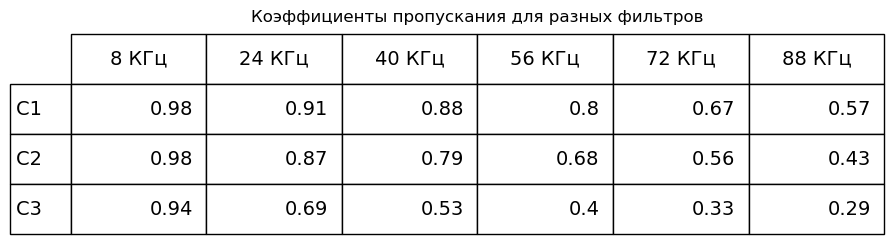

In [114]:
a  = np.array([c1/default, c2/default, c3/default])
df = pd.DataFrame(np.round(a,2), index =["С1    ", "С2    ", "С3   "], columns = someg)
beautyTable("Коэффициенты пропускания для разных фильтров", df, (7, 2.7))

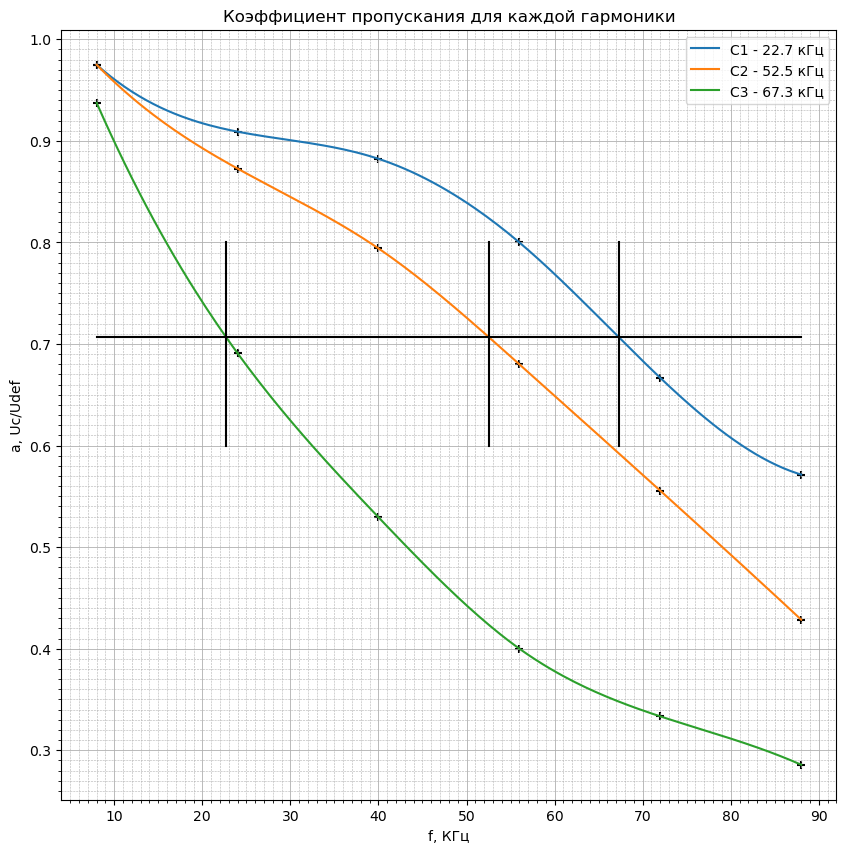

In [146]:
fig, axs = plt.subplots(1,1, figsize = (10,10))
x = np.linspace(8, 88, 200)
axs.set_title("Коэффициент пропускания для каждой гармоники")
axs.set_xlabel("f, КГц")
axs.set_ylabel("a, Uc/Udef")
axs.minorticks_on()
lb = np.array(["C1 - 22.7 кГц", "C2 - 52.5 кГц", "С3 - 67.3 кГц"]) #(1)
step = 15
for i in range(0,3):
    cubic = interpolate.interp1d(omeg, a[i], kind="cubic")
    y = cubic(x)
    axs.scatter(omeg, a[i], s = 35, marker = "+", color = "black")
    axs.plot(x, y, label = lb[i]) 
axs.plot(x, np.linspace(1/(2**0.5), 1/(2**0.5),200), color = "black")
axs.plot(np.linspace(22.7, 22.7, 200), np.linspace(0.6, 0.8, 200), color = "black") #Через подстановку x подбор значений пересечения
axs.plot(np.linspace(52.5, 52.5, 200), np.linspace(0.6, 0.8, 200), color = "black") #Полученные значения подставляются в (1)
axs.plot(np.linspace(67.3, 67.3, 200), np.linspace(0.6, 0.8, 200), color = "black")
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
axs.legend()
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)
plt.show()